In [1]:
# AI20BTECH11025
import numpy as np
import matplotlib.pyplot as plt
import random

In [13]:
class bandit_env():
    def __init__(self, T, K, mean_vec):
        self.T = T
        self.K = K
        self.mean_vec = mean_vec

    def epsilon_greedy(self, epsilon, m):
        reward_vec = np.zeros(self.T)
        regret_vec = np.zeros(self.T+1)

        N = np.zeros(self.K)
        total_rewards = np.zeros(self.K)
        estimated_reward = np.zeros(self.K)


        u = np.zeros(self.K)
        for t in range(self.T):
            if t < m:
                # Sampling a reward from a normal distribution
                reward = np.random.normal(self.mean_vec[t % self.K])
                reward_vec[t] = reward
                regret = np.random.normal(max(self.mean_vec)) - reward
                regret_vec[t+1] = regret + regret_vec[t]
                
                # Updating the estimated reward for the arms
                N[t%self.K] += 1
                total_rewards[t%self.K] += reward
                estimated_reward[t%self.K] = total_rewards[t%self.K]/N[t%self.K]
                
            else:
                # Estimated best arm is the arm with the best estimated reward mean till time t
                estimated_best_arm = np.argmax(estimated_reward)
                
                # Selecting the best arm with a probability 1 - epsilon
                p = np.random.uniform(0, 1)
                if p > (1 - epsilon):
                    estimated_best_arm = np.random.randint(0, self.K)
                    
                reward = np.random.normal(self.mean_vec[estimated_best_arm])
                reward_vec[t] = reward
                regret = np.random.normal(max(self.mean_vec)) - reward
                regret_vec[t+1] = regret + regret_vec[t]
                
                # Updating the estimated reward for the arms
                N[estimated_best_arm] += 1
                total_rewards[estimated_best_arm] += reward
                estimated_reward[estimated_best_arm] = total_rewards[estimated_best_arm]/N[estimated_best_arm]

        return reward_vec, regret_vec, N

    def epsilon_greedy_with_decay(self, epsilon, m):
        reward_vec = np.zeros(self.T)
        regret_vec = np.zeros(self.T+1)

        N = np.zeros(self.K)
        total_rewards = np.zeros(self.K)
        estimated_reward = np.zeros(self.K)

        r = 1
        u = np.zeros(self.K)
        for t in range(self.T):
            if t < m:
                # Sampling a reward from a normal distribution
                reward = np.random.normal(self.mean_vec[t % self.K])
                reward_vec[t] = reward
                regret = np.random.normal(max(self.mean_vec)) - reward
                regret_vec[t+1] = regret + regret_vec[t]
                
                # Updating the estimated reward for the arms
                N[t%self.K] += 1
                total_rewards[t%self.K] += reward
                estimated_reward[t%self.K] = total_rewards[t%self.K]/N[t%self.K]
                
            else:
                # Estimated best arm is the arm with the best estimated reward mean till time t
                estimated_best_arm = np.argmax(estimated_reward)
                
                # Selecting the best arm with a probability 1 - epsilon
                p = np.random.uniform(0, 1)
                if p > (1 - epsilon):
                    estimated_best_arm = np.random.randint(0, self.K)
                    
                reward = np.random.normal(self.mean_vec[estimated_best_arm])
                reward_vec[t] = reward
                regret = np.random.normal(max(self.mean_vec)) - reward
                regret_vec[t+1] = regret + regret_vec[t]
                
                # Updating the estimated reward for the arms
                N[estimated_best_arm] += 1
                total_rewards[estimated_best_arm] += reward
                estimated_reward[estimated_best_arm] = total_rewards[estimated_best_arm]/N[estimated_best_arm]
                epsilon = epsilon/r
                r += 1

        return reward_vec, regret_vec, N

    def UCB(self):
        reward_vec = np.zeros(self.T)
        regret_vec = np.zeros(self.T+1)

        N = np.zeros(self.K)
        total_rewards = np.zeros(self.K)
        estimated_reward = np.zeros(self.K)


        u = np.zeros(self.K)
        for t in range(self.T):
            if t < self.K:
                # Sampling a reward from a normal distribution
                reward = np.random.normal(self.mean_vec[t % self.K])
                reward_vec[t] = reward
                regret = np.random.normal(max(self.mean_vec)) - reward
                regret_vec[t+1] = regret + regret_vec[t]
                
                # Updating the estimated reward for the arms
                N[t%self.K] += 1
                total_rewards[t%self.K] += reward
                estimated_reward[t%self.K] = total_rewards[t%self.K]/N[t%self.K]
            
            else:
                temp_reward = [estimated_reward[i] + 2 * np.sqrt(np.log(t+1)/N[i]) for i in range(self.K)]
                
                # Estimated best arm is the arm with the best estimated reward mean till time t
                estimated_best_arm = np.argmax(temp_reward)
                reward = np.random.normal(self.mean_vec[estimated_best_arm])
                reward_vec[t] = reward
                regret = np.random.normal(max(self.mean_vec)) - reward
                regret_vec[t+1] = regret + regret_vec[t]
                
                # Updating the estimated reward for the arms
                N[estimated_best_arm] += 1
                total_rewards[estimated_best_arm] += reward
                estimated_reward[estimated_best_arm] = total_rewards[estimated_best_arm]/N[estimated_best_arm]

        return reward_vec, regret_vec, N

In [16]:
mean_vec = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
env = bandit_env(1000, len(mean_vec), mean_vec)

# Plot of average reward # 


(Results are obtained by taking the average for 100 rounds)

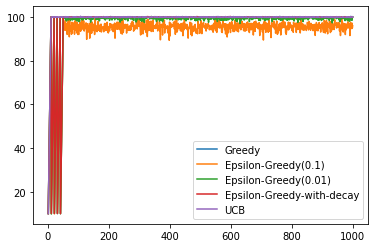

In [ ]:
N = np.arange(1, 1001)
j = 0
for j in range(5):
    x = np.zeros(1000)
    y = np.zeros(1001)
    z = np.zeros(10)

    for i in range(100):
          if(j == 0):
              p, q, r = env.epsilon_greedy(0, 50)
              name = "Greedy"
          if(j == 1):
              p, q, r = env.epsilon_greedy(0.1, 50)
              name = "Epsilon-Greedy(0.1)"
          if(j == 2):
              p, q, r = env.epsilon_greedy(0.01, 50)
              name = "Epsilon-Greedy(0.01)"
          if(j == 3):
              p, q, r = env.epsilon_greedy_with_decay(0.1, 50)
              name = "Epsilon-Greedy-with-decay"
          if(j == 4):
              p, q, r = env.UCB()
              name = "UCB"
          x += p/100
          y += q/100
          z += r/100

    j += 1
    plt.plot(N, x,label=name)

plt.legend()
plt.show()

# Plot a histogram consisting of average number of times each of the 10 arms is pulled for each of the algorithm

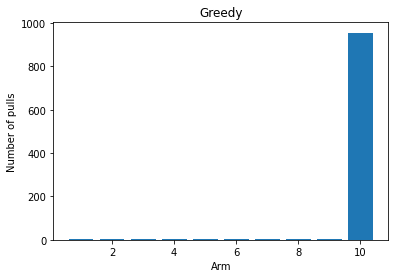

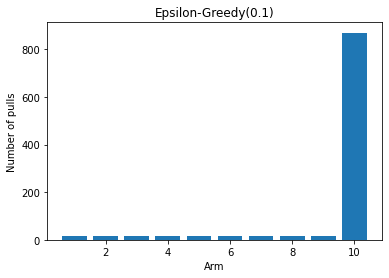

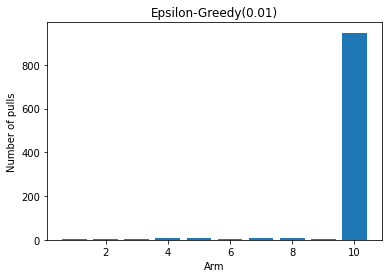

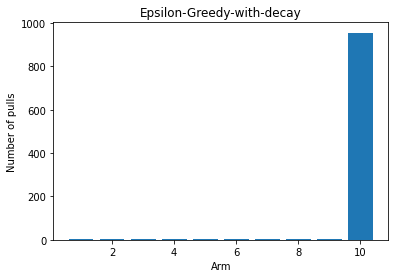

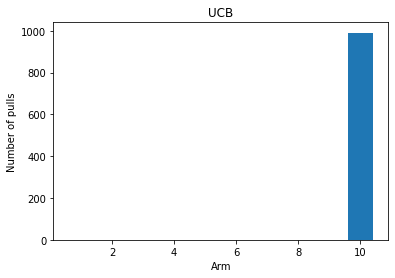

In [ ]:
N = np.arange(1, 11)
j = 0
for j in range(5):
    x = np.zeros(1000)
    y = np.zeros(1001)
    z = np.zeros(10)

    for i in range(100):
          if(j == 0):
              p, q, r = env.epsilon_greedy(0, 50)
              name = "Greedy"
          if(j == 1):
              p, q, r = env.epsilon_greedy(0.1, 50)
              name = "Epsilon-Greedy(0.1)"
          if(j == 2):
              p, q, r = env.epsilon_greedy(0.01, 50)
              name = "Epsilon-Greedy(0.01)"
          if(j == 3):
              p, q, r = env.epsilon_greedy_with_decay(0.1, 50)
              name = "Epsilon-Greedy-with-decay"
          if(j == 4):
              p, q, r = env.UCB()
              name = "UCB"
          x += p/100
          y += q/100
          z += r/100

    j += 1
    plt.bar(N, z)
    plt.title(name)
    plt.xlabel("Arm")
    plt.ylabel("Number of pulls")
    plt.show()


# Average regret as a function of time for each algorithm

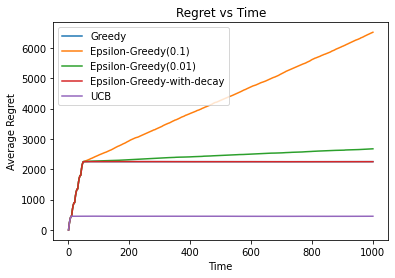

In [17]:
N = np.arange(1, 1002)
j = 0
for j in range(5):
    x = np.zeros(1000)
    y = np.zeros(1001)
    z = np.zeros(10)

    for i in range(100):
          if(j == 0):
              p, q, r = env.epsilon_greedy(0, 50)
              name = "Greedy"
          if(j == 1):
              p, q, r = env.epsilon_greedy(0.1, 50)
              name = "Epsilon-Greedy(0.1)"
          if(j == 2):
              p, q, r = env.epsilon_greedy(0.01, 50)
              name = "Epsilon-Greedy(0.01)"
          if(j == 3):
              p, q, r = env.epsilon_greedy_with_decay(0.01, 50)
              name = "Epsilon-Greedy-with-decay"
          if(j == 4):
              p, q, r = env.UCB()
              name = "UCB"
          x += p/100
          y += q/100
          z += r/100

    j += 1
    plt.plot(N, y, label = name)

plt.title('Regret vs Time')
plt.xlabel("Time")
plt.ylabel("Average Regret")
plt.legend()
plt.show()

# Repeating the above analysis for the scenario when the mean rewards of the second best arm and the best arm are close 

In [6]:
mean_vec = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 90.1])
env = bandit_env(1000, len(mean_vec), mean_vec)

# Plot of average reward # 


(Results are obtained by taking the average for 100 rounds)

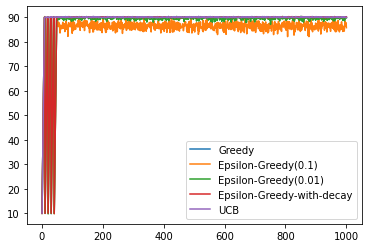

In [ ]:
N = np.arange(1, 1001)
j = 0
for j in range(5):
    x = np.zeros(1000)
    y = np.zeros(1001)
    z = np.zeros(10)

    for i in range(100):
          if(j == 0):
              p, q, r = env.epsilon_greedy(0, 50)
              name = "Greedy"
          if(j == 1):
              p, q, r = env.epsilon_greedy(0.1, 50)
              name = "Epsilon-Greedy(0.1)"
          if(j == 2):
              p, q, r = env.epsilon_greedy(0.01, 50)
              name = "Epsilon-Greedy(0.01)"
          if(j == 3):
              p, q, r = env.epsilon_greedy_with_decay(0.1, 50)
              name = "Epsilon-Greedy-with-decay"
          if(j == 4):
              p, q, r = env.UCB()
              name = "UCB"
          x += p/100
          y += q/100
          z += r/100

    j += 1
    plt.plot(N, x,label=name)

plt.legend()
plt.show()

# Plot a histogram consisting of average number of times each of the 10 arms is pulled for each of the algorithm

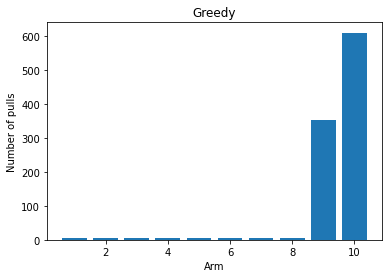

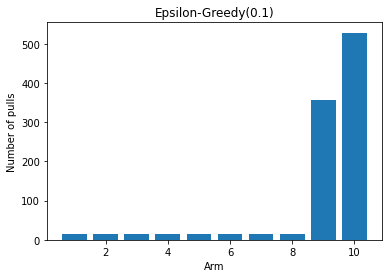

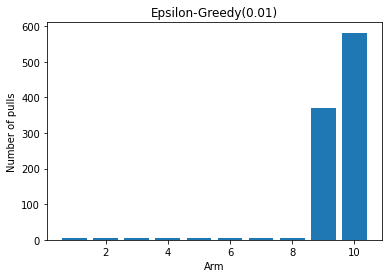

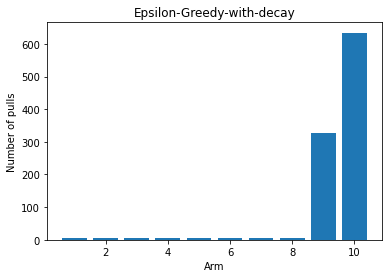

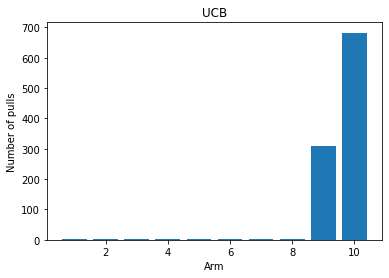

In [ ]:
N = np.arange(1, 11)
j = 0
for j in range(5):
    x = np.zeros(1000)
    y = np.zeros(1001)
    z = np.zeros(10)

    for i in range(100):
          if(j == 0):
              p, q, r = env.epsilon_greedy(0, 50)
              name = "Greedy"
          if(j == 1):
              p, q, r = env.epsilon_greedy(0.1, 50)
              name = "Epsilon-Greedy(0.1)"
          if(j == 2):
              p, q, r = env.epsilon_greedy(0.01, 50)
              name = "Epsilon-Greedy(0.01)"
          if(j == 3):
              p, q, r = env.epsilon_greedy_with_decay(0.1, 50)
              name = "Epsilon-Greedy-with-decay"
          if(j == 4):
              p, q, r = env.UCB()
              name = "UCB"
          x += p/100
          y += q/100
          z += r/100

    j += 1
    plt.bar(N, z)
    plt.title(name)
    plt.xlabel("Arm")
    plt.ylabel("Number of pulls")
    plt.show()


# Average regret as a function of time for each algorithm

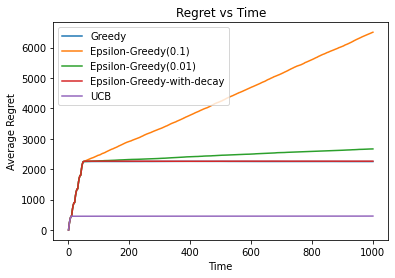

In [18]:
N = np.arange(1, 1002)
j = 0
for j in range(5):
    x = np.zeros(1000)
    y = np.zeros(1001)
    z = np.zeros(10)

    for i in range(100):
          if(j == 0):
              p, q, r = env.epsilon_greedy(0, 50)
              name = "Greedy"
          if(j == 1):
              p, q, r = env.epsilon_greedy(0.1, 50)
              name = "Epsilon-Greedy(0.1)"
          if(j == 2):
              p, q, r = env.epsilon_greedy(0.01, 50)
              name = "Epsilon-Greedy(0.01)"
          if(j == 3):
              p, q, r = env.epsilon_greedy_with_decay(0.1, 50)
              name = "Epsilon-Greedy-with-decay"
          if(j == 4):
              p, q, r = env.UCB()
              name = "UCB"
          x += p/100
          y += q/100
          z += r/100

    j += 1
    plt.plot(N, y, label = name)

plt.title('Regret vs Time')
plt.xlabel("Time")
plt.ylabel("Average Regret")
plt.legend()
plt.show()

From the regret vs time plots, we observe that the regret of UCB algorithm doesn't grow as fast as that of the others. Hence, it is a better strategy to adopt in choosing the best arm in a Multi-Armed bandit setting. It is able to find the optimal action quickly and only tries other actions when there is high uncertainity. 

For the case of having two arms with closer means, we observe that all the strategies visit it more often than the other arms (but ofcourse, less than the best arm). 

